## Imports

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_scatter_density 
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 4 Points on the Galectic Plane 

x = [0 , 90, 180, 270]
y = 0

In [4]:
c = SkyCoord(l = x, b = y, unit='deg',  frame='galactic')

In [5]:
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.40498829, -28.93617776), (318.00438151,  48.32963721),
     ( 86.40498829,  28.93617776), (138.00438151, -48.32963721)]>

In [16]:
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.40498829, -28.93617776), (318.00438151,  48.32963721),
     ( 86.40498829,  28.93617776), (138.00438151, -48.32963721)]>

In [6]:
# 2 Points on Up and Below of Galectic Plane

c = SkyCoord(l = 0, b = [90, -90], unit='deg', frame='galactic')

In [7]:
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(192.85947789,  27.12825241), ( 12.85947789, -27.12825241)]>

---

## Plotting Function

In [17]:
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (1e-20, '#0B0000'),
    (0.15, '#720000'),
    (0.3, '#DB0000'),
    (0.45, '#FF4500'),
    (0.6, '#FFAE00'),
    (0.75, '#FFFF24'),
    (0.9, '#FFFFAC'),
    (1, "#ffffff")
], N=65535)

def using_mpl_scatter_density(fig, dp):
    
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(dp['bp_rp'], 
                                 dp['mg'], 
                                 cmap=hot)
    fig.colorbar(density, label='Number of points per pixel')
    ax.set_xlabel('$ G _{bp} - G _{rp} $')
    ax.set_ylabel('$ M_{G} $')
    ax.set_ylim(20,-10)

---

## Reading data files
  
query: 
```SQL
SELECT source_id, r_est, r_lo, r_hi, gaia_source.ra,gaia_source.dec,gaia_source.parallax,gaia_source.parallax_error,gaia_source.astrometric_n_good_obs_al,gaia_source.astrometric_chi2_al,gaia_source.visibility_periods_used,gaia_source.phot_g_mean_flux_over_error,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_flux_over_error,gaia_source.phot_bp_mean_mag,gaia_source.phot_rp_mean_flux_over_error,gaia_source.phot_rp_mean_mag,gaia_source.phot_bp_rp_excess_factor,gaia_source.bp_rp,gaia_source.l,gaia_source.b
FROM external.gaiadr2_geometric_distance
JOIN gaiadr2.gaia_source USING (source_id)
WHERE CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
 	CIRCLE('ICRS', #l , #b ,1) 
)=1
```

In [19]:
df0_0 = pd.read_csv('../data/0_0 - 1 deg-result.csv')
df90_0 = pd.read_csv('../data/90_0 - 1 deg-result.csv')
df180_0 = pd.read_csv('../data/180_0 - 1 deg-result.csv')
df270_0 = pd.read_csv('../data/270_0 - 1 deg-result.csv')
df0_90 = pd.read_csv('../data/0_90 - 1 deg-result.csv')
df0_m90 = pd.read_csv('../data/0_-90 - 1 deg-result.csv')

---

## Data at 0:0 in Galactic Coo.

In [21]:
df0_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287201 entries, 0 to 287200
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   source_id                     287201 non-null  int64  
 1   r_est                         287201 non-null  float64
 2   r_lo                          287201 non-null  float64
 3   r_hi                          287201 non-null  float64
 4   ra                            287201 non-null  float64
 5   dec                           287201 non-null  float64
 6   parallax                      287201 non-null  float64
 7   parallax_error                287201 non-null  float64
 8   astrometric_n_good_obs_al     287201 non-null  int64  
 9   astrometric_chi2_al           287201 non-null  float64
 10  visibility_periods_used       287201 non-null  int64  
 11  phot_g_mean_flux_over_error   287201 non-null  float64
 12  phot_g_mean_mag               287201 non-nul

In [20]:
df0_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,287201.0,4.057877e+18,1.218216e+15,4.056817e+18,4.057234e+18,4.057397e+18,4.057601e+18,4.060699e+18
r_est,287201.0,3.404074e+03,1.623435e+03,1.301665e+01,1.932577e+03,3.655324e+03,4.698513e+03,1.858595e+04
r_lo,287201.0,1.787546e+03,8.046925e+02,0.000000e+00,1.211347e+03,1.753638e+03,2.265535e+03,1.411534e+04
r_hi,287201.0,6.580786e+03,3.009504e+03,1.325552e+01,3.864592e+03,7.709393e+03,8.994113e+03,2.436147e+04
ra,287201.0,2.665588e+02,6.323661e-01,2.652624e+02,2.660340e+02,2.666642e+02,2.671052e+02,2.675475e+02
dec,287201.0,-2.890813e+01,4.863533e-01,-2.993595e+01,-2.929762e+01,-2.890345e+01,-2.849189e+01,-2.793646e+01
parallax,287201.0,4.844414e-01,9.461790e-01,-3.061900e+01,1.666822e-01,4.722105e-01,8.036359e-01,7.684470e+01
parallax_error,287201.0,4.960419e-01,4.344289e-01,2.228644e-02,1.712861e-01,3.637433e-01,6.914827e-01,3.586241e+00
astrometric_n_good_obs_al,287201.0,1.199195e+02,2.316286e+01,4.100000e+01,1.050000e+02,1.220000e+02,1.370000e+02,1.890000e+02
astrometric_chi2_al,287201.0,2.022827e+02,8.922931e+02,1.953511e+01,1.164525e+02,1.422127e+02,1.742719e+02,1.648777e+05


In [11]:
df0_0.sample(4)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
94611,4057152001884012672,868.535307,653.142738,1297.390617,265.755467,-29.112096,1.229738,0.275453,121,126.134820,...,313.298900,18.651102,10.009155,19.766733,57.883210,17.601164,1.382857,2.165569,359.552837,0.391882
150470,4056887981667667072,4283.009115,1878.817349,8583.997022,266.327150,-29.622509,0.406749,0.514594,118,138.988420,...,176.575330,19.769482,4.159304,21.305176,23.795692,18.569632,1.464567,2.735544,359.378902,-0.299845
215266,4057412590487742464,4115.902149,1603.476654,8353.971029,267.387967,-28.642398,0.903426,0.865617,84,88.068954,...,92.401825,20.245285,NaN,NaN,NaN,NaN,NaN,NaN,0.697208,-0.585109
60905,4057303051617880320,4612.009481,2033.008902,8876.519980,267.390340,-28.854771,0.268572,0.965768,81,100.664276,...,120.466034,20.195450,3.194125,20.765839,4.929083,18.942814,1.784008,1.823025,0.516093,-0.696051


In [22]:
len(df0_0)

287201

In [23]:
df0_0 = df0_0[~(df0_0['parallax'].isnull()) & ~(df0_0['bp_rp'].isnull())]
len(df0_0)

264314

In [24]:
# POSITIVE PARALLAX FOR LOG

df0_0 = df0_0[df0_0['parallax'] > 0]
df0_0['mg'] = df0_0['phot_g_mean_mag'] + (5 * np.log10(df0_0['parallax']) -10)
len(df0_0)

219540

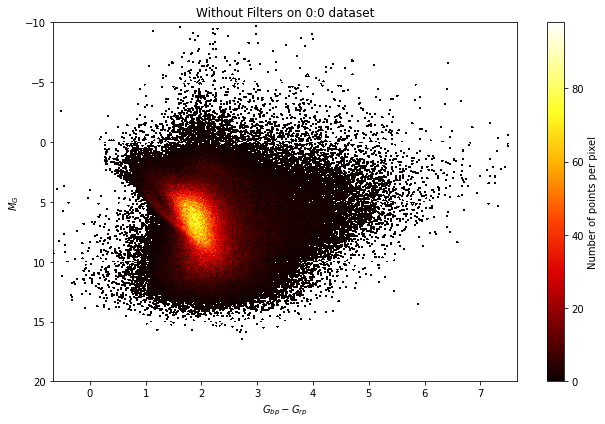

In [29]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df0_0)


plt.title('Without Filters on 0:0 dataset')
plt.tight_layout()
plt.show()

* Applying some limitations based on Article

In [30]:
df0_0 = df0_0[(df0_0['phot_g_mean_flux_over_error'] > 50) & (df0_0['phot_rp_mean_flux_over_error']>20) & (df0_0['phot_bp_mean_flux_over_error']>20)]

In [31]:
df0_0 = df0_0[df0_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df0_0['phot_bp_mean_mag'] - df0_0['phot_rp_mean_mag'])**2)]

In [32]:
df0_0 = df0_0[df0_0['phot_bp_rp_excess_factor'] > (1.0 + 0.015 * ( df0_0['phot_bp_mean_mag'] - df0_0['phot_rp_mean_mag'])**2)]

In [33]:
df0_0 = df0_0[df0_0['visibility_periods_used'] > 8]

In [34]:
df0_0['MAX'] = np.exp(-0.4 * (df0_0['phot_g_mean_mag']-19.5))

In [35]:
df0_0['MAX'] = df0_0['MAX'].apply(lambda x: 1 if(x<1) else x)

In [36]:
df0_0 = df0_0[(df0_0['astrometric_chi2_al'] / (df0_0['astrometric_n_good_obs_al']-5)) < 1.44 * df0_0["MAX"]]

In [38]:
df0_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80608 entries, 0 to 287200
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     80608 non-null  int64  
 1   r_est                         80608 non-null  float64
 2   r_lo                          80608 non-null  float64
 3   r_hi                          80608 non-null  float64
 4   ra                            80608 non-null  float64
 5   dec                           80608 non-null  float64
 6   parallax                      80608 non-null  float64
 7   parallax_error                80608 non-null  float64
 8   astrometric_n_good_obs_al     80608 non-null  int64  
 9   astrometric_chi2_al           80608 non-null  float64
 10  visibility_periods_used       80608 non-null  int64  
 11  phot_g_mean_flux_over_error   80608 non-null  float64
 12  phot_g_mean_mag               80608 non-null  float64
 13  

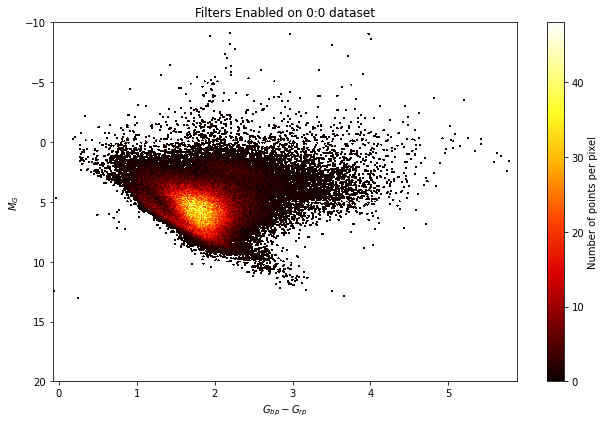

In [40]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df0_0)

plt.title('Filters Enabled on 0:0 dataset')
plt.tight_layout()
plt.show()

### Extiction

In [24]:
###

---

## Working on data at 90:0 in Galactic Coo.

In [42]:
df90_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343283 entries, 0 to 343282
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   source_id                     343283 non-null  int64  
 1   r_est                         343283 non-null  float64
 2   r_lo                          343283 non-null  float64
 3   r_hi                          343283 non-null  float64
 4   ra                            343283 non-null  float64
 5   dec                           343283 non-null  float64
 6   parallax                      343283 non-null  float64
 7   parallax_error                343283 non-null  float64
 8   astrometric_n_good_obs_al     343283 non-null  int64  
 9   astrometric_chi2_al           343283 non-null  float64
 10  visibility_periods_used       343283 non-null  int64  
 11  phot_g_mean_flux_over_error   343283 non-null  float64
 12  phot_g_mean_mag               343283 non-nul

In [43]:
df90_0.sample(4)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
284296,2165289418478713984,2196.753583,1222.207520,4068.873058,317.736543,48.026849,0.405734,0.467599,185,217.35002,...,280.52164,19.746183,13.373170,20.431793,16.341352,18.452410,1.792502,1.979383,89.657015,-0.077096
106375,2165253993583283712,1187.033159,967.276382,1529.122297,317.353285,47.630339,0.843243,0.167585,162,193.26515,...,544.39930,17.831444,14.668508,18.412874,44.140068,16.655704,1.687283,1.757170,89.191491,-0.159014
107679,2165672151599754624,2796.672283,1621.026529,4749.473687,318.258879,48.348201,-0.124318,0.514837,246,247.27623,...,174.73483,20.195158,12.007600,20.824146,33.209747,18.979847,1.715592,1.844299,90.129712,-0.110166
43438,2164890295758119424,2218.856842,1097.602761,4147.390963,319.318189,48.276099,0.195120,0.972140,141,152.43938,...,115.31528,20.667034,4.778794,21.284500,16.522993,19.285479,1.935867,1.999022,90.566180,-0.667877


In [44]:
df90_0 = df90_0[~(df90_0['parallax'].isnull()) & ~(df90_0['bp_rp'].isnull())]

In [45]:
# POSITIVE PARALLAX FOR LOG

df90_0 = df90_0[df90_0['parallax'] > 0]
df90_0['mg'] = df90_0['phot_g_mean_mag'] + (5 * np.log10(df90_0['parallax']) -10)

In [47]:
df90_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253046 entries, 2 to 343282
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   source_id                     253046 non-null  int64  
 1   r_est                         253046 non-null  float64
 2   r_lo                          253046 non-null  float64
 3   r_hi                          253046 non-null  float64
 4   ra                            253046 non-null  float64
 5   dec                           253046 non-null  float64
 6   parallax                      253046 non-null  float64
 7   parallax_error                253046 non-null  float64
 8   astrometric_n_good_obs_al     253046 non-null  int64  
 9   astrometric_chi2_al           253046 non-null  float64
 10  visibility_periods_used       253046 non-null  int64  
 11  phot_g_mean_flux_over_error   253046 non-null  float64
 12  phot_g_mean_mag               253046 non-nul

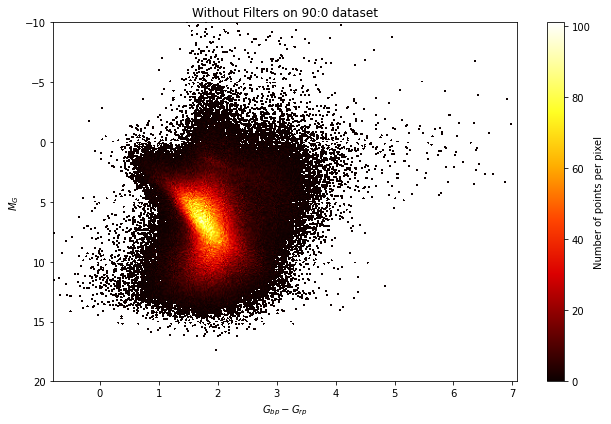

In [48]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df90_0)

plt.title('Without Filters on 90:0 dataset')
plt.tight_layout()
plt.show()

In [49]:
# Filters 

df90_0 = df90_0[(df90_0['phot_g_mean_flux_over_error'] > 50) & (df90_0['phot_rp_mean_flux_over_error']>20) & (df90_0['phot_bp_mean_flux_over_error']>20)]
df90_0 = df90_0[df90_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df90_0['phot_bp_mean_mag'] - df90_0['phot_rp_mean_mag'])**2)]
df90_0 = df90_0[df90_0['visibility_periods_used'] > 8]
df90_0['MAX'] = np.exp(-0.4 * (df90_0['phot_g_mean_mag']-19.5))
df90_0['MAX'] = df90_0['MAX'].apply(lambda x: 1 if(x<1) else x)
df90_0 = df90_0[(df90_0['astrometric_chi2_al'] / (df90_0['astrometric_n_good_obs_al']-5)) < 1.44 * df90_0["MAX"]]

In [51]:
df90_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98533 entries, 6 to 343279
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     98533 non-null  int64  
 1   r_est                         98533 non-null  float64
 2   r_lo                          98533 non-null  float64
 3   r_hi                          98533 non-null  float64
 4   ra                            98533 non-null  float64
 5   dec                           98533 non-null  float64
 6   parallax                      98533 non-null  float64
 7   parallax_error                98533 non-null  float64
 8   astrometric_n_good_obs_al     98533 non-null  int64  
 9   astrometric_chi2_al           98533 non-null  float64
 10  visibility_periods_used       98533 non-null  int64  
 11  phot_g_mean_flux_over_error   98533 non-null  float64
 12  phot_g_mean_mag               98533 non-null  float64
 13  

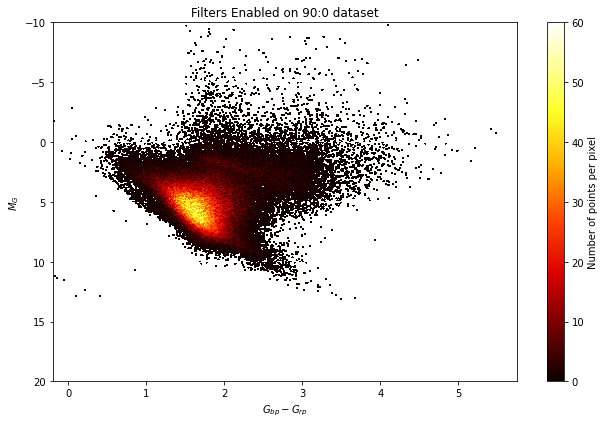

In [52]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df90_0)

plt.title('Filters Enabled on 90:0 dataset')
plt.tight_layout()
plt.show()

### Extiction

In [33]:
#### 

---

## Working on data at 180:0 in Galactic Coo.

In [54]:
df180_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89879 entries, 0 to 89878
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     89879 non-null  int64  
 1   r_est                         89879 non-null  float64
 2   r_lo                          89879 non-null  float64
 3   r_hi                          89879 non-null  float64
 4   ra                            89879 non-null  float64
 5   dec                           89879 non-null  float64
 6   parallax                      89879 non-null  float64
 7   parallax_error                89879 non-null  float64
 8   astrometric_n_good_obs_al     89879 non-null  int64  
 9   astrometric_chi2_al           89879 non-null  float64
 10  visibility_periods_used       89879 non-null  int64  
 11  phot_g_mean_flux_over_error   89879 non-null  float64
 12  phot_g_mean_mag               89879 non-null  float64
 13  p

In [55]:
df180_0.sample(3)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
40348,3443457422177792640,5012.434944,3417.750094,7429.543277,87.175798,29.186165,-0.133934,0.176231,129,122.86018,...,359.13205,18.153435,21.661783,18.624697,48.594620,17.238058,1.464869,1.386639,180.135376,0.705776
56516,3444135339819956992,2473.744431,1259.064995,4739.153981,85.803481,28.897064,0.407340,0.570040,112,114.78240,...,162.13649,19.542635,13.092613,20.844143,19.850700,18.197765,1.691285,2.646378,179.757853,-0.469167
31727,3443377054750469760,2010.211510,1352.314466,3458.637345,85.836311,28.630838,0.503314,0.206834,162,182.15163,...,418.95615,18.382841,24.936985,19.145401,62.433857,17.419706,1.397603,1.725695,179.999525,-0.584509


In [56]:
df180_0 = df180_0[~(df180_0['parallax'].isnull()) & ~(df180_0['bp_rp'].isnull())]

In [57]:
# POSITIVE PARALLAX FOR LOG

df180_0 = df180_0[df180_0['parallax'] > 0]
df180_0['mg'] = df180_0['phot_g_mean_mag'] + (5 * np.log10(df180_0['parallax']) -10)

In [59]:
df180_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70884 entries, 0 to 89878
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     70884 non-null  int64  
 1   r_est                         70884 non-null  float64
 2   r_lo                          70884 non-null  float64
 3   r_hi                          70884 non-null  float64
 4   ra                            70884 non-null  float64
 5   dec                           70884 non-null  float64
 6   parallax                      70884 non-null  float64
 7   parallax_error                70884 non-null  float64
 8   astrometric_n_good_obs_al     70884 non-null  int64  
 9   astrometric_chi2_al           70884 non-null  float64
 10  visibility_periods_used       70884 non-null  int64  
 11  phot_g_mean_flux_over_error   70884 non-null  float64
 12  phot_g_mean_mag               70884 non-null  float64
 13  p

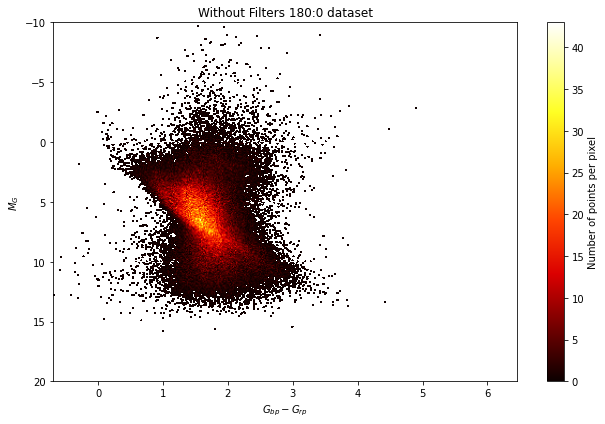

In [61]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df180_0)

plt.title('Without Filters 180:0 dataset')
plt.tight_layout()
plt.show()

In [62]:
# Filters 

df180_0 = df180_0[(df180_0['phot_g_mean_flux_over_error'] > 50) & (df180_0['phot_rp_mean_flux_over_error']>20) & (df180_0['phot_bp_mean_flux_over_error']>20)]
df180_0 = df180_0[df180_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df180_0['phot_bp_mean_mag'] - df180_0['phot_rp_mean_mag'])**2)]
df180_0 = df180_0[df180_0['visibility_periods_used'] > 8]
df180_0['MAX'] = np.exp(-0.4 * (df180_0['phot_g_mean_mag']-19.5))
df180_0['MAX'] = df180_0['MAX'].apply(lambda x: 1 if(x<1) else x)
df180_0 = df180_0[(df180_0['astrometric_chi2_al'] / (df180_0['astrometric_n_good_obs_al']-5)) < 1.44 * df180_0["MAX"]]

In [63]:
df180_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35435 entries, 2 to 89874
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     35435 non-null  int64  
 1   r_est                         35435 non-null  float64
 2   r_lo                          35435 non-null  float64
 3   r_hi                          35435 non-null  float64
 4   ra                            35435 non-null  float64
 5   dec                           35435 non-null  float64
 6   parallax                      35435 non-null  float64
 7   parallax_error                35435 non-null  float64
 8   astrometric_n_good_obs_al     35435 non-null  int64  
 9   astrometric_chi2_al           35435 non-null  float64
 10  visibility_periods_used       35435 non-null  int64  
 11  phot_g_mean_flux_over_error   35435 non-null  float64
 12  phot_g_mean_mag               35435 non-null  float64
 13  p

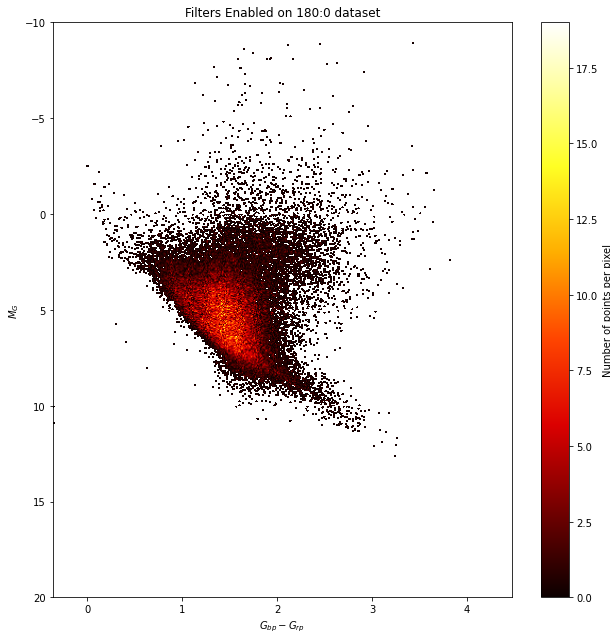

In [64]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df180_0)

plt.title('Filters Enabled on 180:0 dataset')
plt.tight_layout()
plt.show()

---

## Working on 270:0 dataset

In [66]:
df270_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73387 entries, 0 to 73386
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     73387 non-null  int64  
 1   r_est                         73387 non-null  float64
 2   r_lo                          73387 non-null  float64
 3   r_hi                          73387 non-null  float64
 4   ra                            73387 non-null  float64
 5   dec                           73387 non-null  float64
 6   parallax                      73387 non-null  float64
 7   parallax_error                73387 non-null  float64
 8   astrometric_n_good_obs_al     73387 non-null  int64  
 9   astrometric_chi2_al           73387 non-null  float64
 10  visibility_periods_used       73387 non-null  int64  
 11  phot_g_mean_flux_over_error   73387 non-null  float64
 12  phot_g_mean_mag               73387 non-null  float64
 13  p

In [67]:
df270_0.sample(3)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
50215,5326027762239078272,2329.702600,1508.476413,3953.070552,137.972699,-48.801686,0.379617,0.242571,236,281.97263,...,434.48175,19.190550,18.727974,20.680580,72.535515,17.928015,1.548676,2.752565,270.329218,-0.338942
50232,5326013782123326080,960.056885,860.908542,1084.378377,137.881533,-48.927217,1.026903,0.114886,219,254.82290,...,930.23553,17.809843,50.169420,18.868454,165.585400,16.731924,1.426256,2.136530,270.379575,-0.468630
61802,5326165716588625536,5872.369734,4300.979709,8070.304264,139.286968,-48.816136,-0.253661,0.137057,245,364.46850,...,822.85840,17.811312,18.076208,20.007082,224.686750,16.399010,1.661409,3.608072,270.938417,0.276064


In [68]:
df270_0 = df270_0[~(df270_0['parallax'].isnull()) & ~(df270_0['bp_rp'].isnull())]

In [69]:
# POSITIVE PARALLAX FOR LOG

df270_0 = df270_0[df270_0['parallax'] > 0]
df270_0['mg'] = df270_0['phot_g_mean_mag'] + (5 * np.log10(df270_0['parallax']) -10)

In [71]:
df270_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56815 entries, 0 to 73386
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     56815 non-null  int64  
 1   r_est                         56815 non-null  float64
 2   r_lo                          56815 non-null  float64
 3   r_hi                          56815 non-null  float64
 4   ra                            56815 non-null  float64
 5   dec                           56815 non-null  float64
 6   parallax                      56815 non-null  float64
 7   parallax_error                56815 non-null  float64
 8   astrometric_n_good_obs_al     56815 non-null  int64  
 9   astrometric_chi2_al           56815 non-null  float64
 10  visibility_periods_used       56815 non-null  int64  
 11  phot_g_mean_flux_over_error   56815 non-null  float64
 12  phot_g_mean_mag               56815 non-null  float64
 13  p

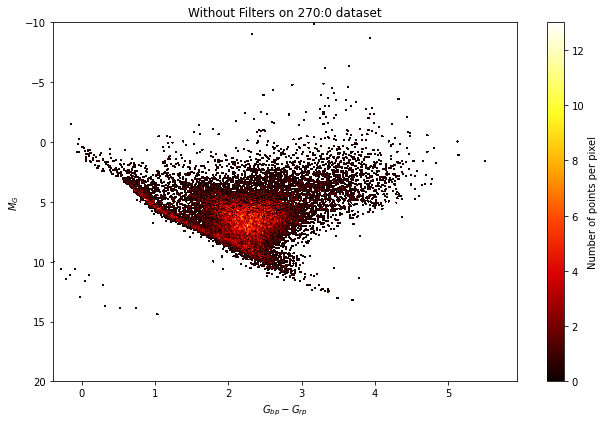

In [89]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df270_0)

plt.title('Without Filters on 270:0 dataset')
plt.tight_layout()
plt.show()

In [73]:
# Filters 

df270_0 = df270_0[(df270_0['phot_g_mean_flux_over_error'] > 50) & (df270_0['phot_rp_mean_flux_over_error']>20) & (df270_0['phot_bp_mean_flux_over_error']>20)]
df270_0 = df270_0[df270_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df270_0['phot_bp_mean_mag'] - df270_0['phot_rp_mean_mag'])**2)]
df270_0 = df270_0[df270_0['visibility_periods_used'] > 8]
df270_0['MAX'] = np.exp(-0.4 * (df270_0['phot_g_mean_mag']-19.5))
df270_0['MAX'] = df270_0['MAX'].apply(lambda x: 1 if(x<1) else x)
df270_0 = df270_0[(df270_0['astrometric_chi2_al'] / (df270_0['astrometric_n_good_obs_al']-5)) < 1.44 * df270_0["MAX"]]

In [75]:
df270_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15370 entries, 11 to 73381
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     15370 non-null  int64  
 1   r_est                         15370 non-null  float64
 2   r_lo                          15370 non-null  float64
 3   r_hi                          15370 non-null  float64
 4   ra                            15370 non-null  float64
 5   dec                           15370 non-null  float64
 6   parallax                      15370 non-null  float64
 7   parallax_error                15370 non-null  float64
 8   astrometric_n_good_obs_al     15370 non-null  int64  
 9   astrometric_chi2_al           15370 non-null  float64
 10  visibility_periods_used       15370 non-null  int64  
 11  phot_g_mean_flux_over_error   15370 non-null  float64
 12  phot_g_mean_mag               15370 non-null  float64
 13  

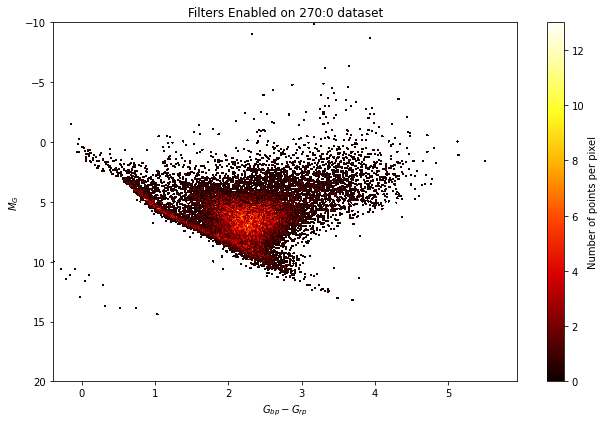

In [88]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df270_0)

plt.title("Filters Enabled on 270:0 dataset")
plt.tight_layout()
plt.show()

--- 
## Working on 0:90 dataset

In [78]:
df0_90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6914 entries, 0 to 6913
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     6914 non-null   int64  
 1   r_est                         6914 non-null   float64
 2   r_lo                          6914 non-null   float64
 3   r_hi                          6914 non-null   float64
 4   ra                            6914 non-null   float64
 5   dec                           6914 non-null   float64
 6   parallax                      6914 non-null   float64
 7   parallax_error                6914 non-null   float64
 8   astrometric_n_good_obs_al     6914 non-null   int64  
 9   astrometric_chi2_al           6914 non-null   float64
 10  visibility_periods_used       6914 non-null   int64  
 11  phot_g_mean_flux_over_error   6914 non-null   float64
 12  phot_g_mean_mag               6914 non-null   float64
 13  pho

In [79]:
df0_90 = df0_90[~(df0_90['parallax'].isnull()) & ~(df0_90['bp_rp'].isnull())]

In [80]:
# POSITIVE PARALLAX FOR LOG

df0_90 = df0_90[df0_90['parallax'] > 0]
df0_90['mg'] = df0_90['phot_g_mean_mag'] + (5 * np.log10(df0_90['parallax']) -10)

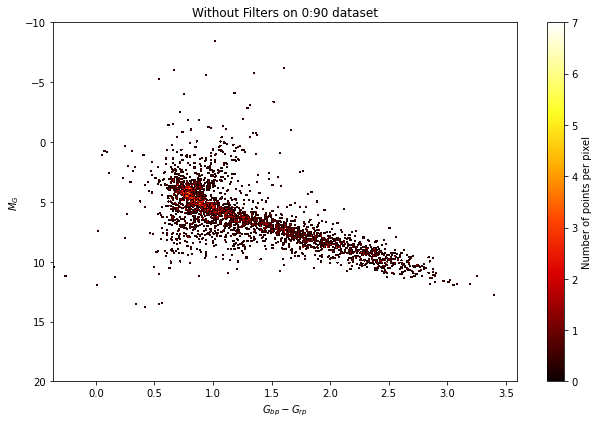

In [87]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df0_90)

plt.title('Without Filters on 0:90 dataset')
plt.tight_layout()
plt.show()

In [82]:
# Filters 

df0_90 = df0_90[(df0_90['phot_g_mean_flux_over_error'] > 50) & (df0_90['phot_rp_mean_flux_over_error']>20) & (df0_90['phot_bp_mean_flux_over_error']>20)]
df0_90 = df0_90[df0_90['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df0_90['phot_bp_mean_mag'] - df0_90['phot_rp_mean_mag'])**2)]
df0_90 = df0_90[df0_90['visibility_periods_used'] > 8]
df0_90['MAX'] = np.exp(-0.4 * (df0_90['phot_g_mean_mag']-19.5))
df0_90['MAX'] = df0_90['MAX'].apply(lambda x: 1 if(x<1) else x)
df0_90 = df0_90[(df0_90['astrometric_chi2_al'] / (df0_90['astrometric_n_good_obs_al']-5)) < 1.44 * df0_90["MAX"]]

In [84]:
df0_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 6913
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     2956 non-null   int64  
 1   r_est                         2956 non-null   float64
 2   r_lo                          2956 non-null   float64
 3   r_hi                          2956 non-null   float64
 4   ra                            2956 non-null   float64
 5   dec                           2956 non-null   float64
 6   parallax                      2956 non-null   float64
 7   parallax_error                2956 non-null   float64
 8   astrometric_n_good_obs_al     2956 non-null   int64  
 9   astrometric_chi2_al           2956 non-null   float64
 10  visibility_periods_used       2956 non-null   int64  
 11  phot_g_mean_flux_over_error   2956 non-null   float64
 12  phot_g_mean_mag               2956 non-null   float64
 13  pho

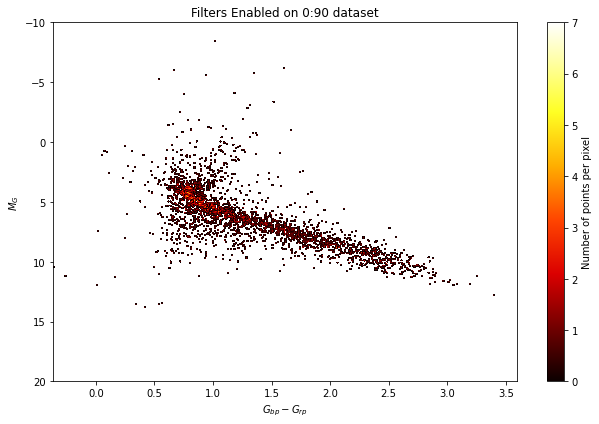

In [86]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df0_90)

plt.title('Filters Enabled on 0:90 dataset')
plt.tight_layout()
plt.show()

### Extinction

In [58]:
###

--- 
## Working on 0:-90 Dataset

In [91]:
df0_m90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18772 entries, 0 to 18771
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     18772 non-null  int64  
 1   r_est                         18772 non-null  float64
 2   r_lo                          18772 non-null  float64
 3   r_hi                          18772 non-null  float64
 4   ra                            18772 non-null  float64
 5   dec                           18772 non-null  float64
 6   parallax                      18772 non-null  float64
 7   parallax_error                18772 non-null  float64
 8   astrometric_n_good_obs_al     18772 non-null  int64  
 9   astrometric_chi2_al           18772 non-null  float64
 10  visibility_periods_used       18772 non-null  int64  
 11  phot_g_mean_flux_over_error   18772 non-null  float64
 12  phot_g_mean_mag               18772 non-null  float64
 13  p

In [92]:
df0_m90 = df0_m90[~(df0_m90['parallax'].isnull()) & ~(df0_m90['bp_rp'].isnull())]

In [93]:
# POSITIVE PARALLAX FOR LOG

df0_m90 = df0_m90[df0_m90['parallax'] > 0]
df0_m90['mg'] = df0_m90['phot_g_mean_mag'] + (5 * np.log10(df0_m90['parallax']) -10)

In [95]:
df0_m90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11486 entries, 0 to 18771
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     11486 non-null  int64  
 1   r_est                         11486 non-null  float64
 2   r_lo                          11486 non-null  float64
 3   r_hi                          11486 non-null  float64
 4   ra                            11486 non-null  float64
 5   dec                           11486 non-null  float64
 6   parallax                      11486 non-null  float64
 7   parallax_error                11486 non-null  float64
 8   astrometric_n_good_obs_al     11486 non-null  int64  
 9   astrometric_chi2_al           11486 non-null  float64
 10  visibility_periods_used       11486 non-null  int64  
 11  phot_g_mean_flux_over_error   11486 non-null  float64
 12  phot_g_mean_mag               11486 non-null  float64
 13  p

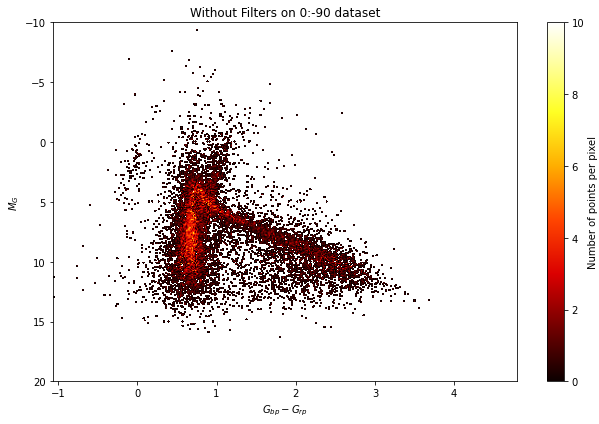

In [96]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df0_m90)

plt.title('Without Filters on 0:-90 dataset')
plt.tight_layout()
plt.show()

In [97]:
# Filters 

df0_m90 = df0_m90[(df0_m90['phot_g_mean_flux_over_error'] > 50) & (df0_m90['phot_rp_mean_flux_over_error']>20) & (df0_m90['phot_bp_mean_flux_over_error']>20)]
df0_m90 = df0_m90[df0_m90['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df0_m90['phot_bp_mean_mag'] - df0_m90['phot_rp_mean_mag'])**2)]
df0_m90 = df0_m90[df0_m90['visibility_periods_used'] > 8]
df0_m90['MAX'] = np.exp(-0.4 * (df0_m90['phot_g_mean_mag']-19.5))
df0_m90['MAX'] = df0_m90['MAX'].apply(lambda x: 1 if(x<1) else x)
df0_m90 = df0_m90[(df0_m90['astrometric_chi2_al'] / (df0_m90['astrometric_n_good_obs_al']-5)) < 1.44 * df0_m90["MAX"]]

In [99]:
df0_m90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4633 entries, 0 to 18769
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source_id                     4633 non-null   int64  
 1   r_est                         4633 non-null   float64
 2   r_lo                          4633 non-null   float64
 3   r_hi                          4633 non-null   float64
 4   ra                            4633 non-null   float64
 5   dec                           4633 non-null   float64
 6   parallax                      4633 non-null   float64
 7   parallax_error                4633 non-null   float64
 8   astrometric_n_good_obs_al     4633 non-null   int64  
 9   astrometric_chi2_al           4633 non-null   float64
 10  visibility_periods_used       4633 non-null   int64  
 11  phot_g_mean_flux_over_error   4633 non-null   float64
 12  phot_g_mean_mag               4633 non-null   float64
 13  ph

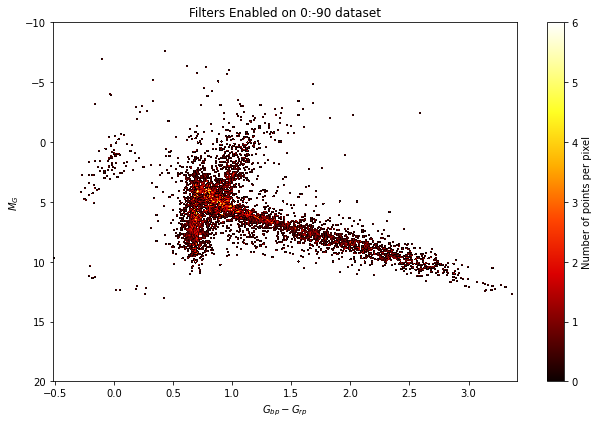

In [100]:
fig = plt.figure(figsize=(9,6))
using_mpl_scatter_density(fig, df0_m90)

plt.title('Filters Enabled on 0:-90 dataset')
plt.tight_layout()
plt.show()